# MACHINE LEARNING TESTING PROJECT

## DATA CLEANSING

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from functions import *

df= pd.read_csv('ds_salaries.csv')
df.head(10)

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [2]:
k_df= pd.DataFrame(df[['work_year','experience_level', 'employment_type','salary_in_usd', 'remote_ratio',
       'company_size', 'job_title', 'employee_residence', 'salary_currency','company_location' ]])
k_df

,work_year,experience_level,employment_type,salary_in_usd,remote_ratio,company_size,job_title,employee_residence,salary_currency,company_location
0,2020,MI,FT,79833,0,L,Data Scientist,DE,EUR,DE
1,2020,SE,FT,260000,0,S,Machine Learning Scientist,JP,USD,JP
2,2020,SE,FT,109024,50,M,Big Data Engineer,GB,GBP,GB
3,2020,MI,FT,20000,0,S,Product Data Analyst,HN,USD,HN
4,2020,SE,FT,150000,50,L,Machine Learning Engineer,US,USD,US
...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,154000,100,M,Data Engineer,US,USD,US
603,2022,SE,FT,126000,100,M,Data Engineer,US,USD,US
604,2022,SE,FT,129000,0,M,Data Analyst,US,USD,US
605,2022,SE,FT,150000,100,M,Data Analyst,US,USD,US


In [3]:
k_df.salary_in_usd.describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

In [4]:
K_converted=[]
for i in k_df.salary_in_usd:
    if i <= 62726:
        K_converted.append(0)
    elif i > 62726 and i <= 101570:
        
        K_converted.append(1)
    else:
        
        K_converted.append(2)
k_df['salaries_converted']= K_converted
k_df_clean= k_df.drop('salary_in_usd', axis=1)
k_df_clean
experience_converted= []
for i in k_df_clean.experience_level:
    if i== 'MI':
        experience_converted.append(0)
    elif i== 'SE':
        experience_converted.append(1)
    elif 1=='EN':
        experience_converted.append(2)
    else:
        experience_converted.append(3)

k_df_clean['experience_converted']= experience_converted

employment_type_converted= []
for i in k_df_clean.employment_type:
    if i== 'FT':
        employment_type_converted.append(0)
    elif i== 'CT':
        employment_type_converted.append(1)
    elif 1=='PT':
        employment_type_converted.append(2)
    else:
        employment_type_converted.append(3)


k_df_clean['employment_type_converted']= employment_type_converted

company_size_converted= []
for i in k_df_clean.company_size:
    if i== 'M':
        company_size_converted.append(0)
    elif i== 'L':
        company_size_converted.append(1)
    else:
        company_size_converted.append(2)
k_df_clean['company_size_converted']=company_size_converted
k_df_clean= k_df_clean.drop(['employment_type','company_size','experience_level'], axis=1)

remote_ratio_converted=[]
for i in k_df_clean.remote_ratio:
    if i== 0:
        remote_ratio_converted.append(0)
    elif i==50:
        remote_ratio_converted.append(1)
    else:
        remote_ratio_converted.append(2)
k_df_clean['remote_ratio_converted']= remote_ratio_converted
k_df_clean= k_df_clean.drop('remote_ratio', axis=1)


job_title_convert=['Data Scientist','Data Engineer', 'Data Analyst', 'data other']
k_df_clean.job_title = k_df_clean.job_title.apply(lambda x: 'data other' if x not in job_title_convert else x)

job_title_converted=[]
for i in k_df_clean.job_title:
    if i== 'data other':
        job_title_converted.append(0)
    elif i=='Data Scientist':
        job_title_converted.append(1)
    elif i=='Data Engineer':
        job_title_converted.append(2)
    else:
        job_title_converted.append(3)
k_df_clean['job_title_converted']= job_title_converted
k_df_clean= k_df_clean.drop('job_title', axis=1)

employee_residence_convert=['US','GB', 'IN']
k_df_clean.employee_residence = k_df_clean.employee_residence.apply(lambda x: 'other' if x not in employee_residence_convert else x)

employee_residence_converted=[]
for i in k_df_clean.employee_residence:
    if i== 'US':
        employee_residence_converted.append(0)
    elif i=='GB':
        employee_residence_converted.append(1)
    elif i=='IN':
        employee_residence_converted.append(2)
    else:
        employee_residence_converted.append(3)
k_df_clean['employee_residence_converted']= employee_residence_converted
k_df_clean= k_df_clean.drop('employee_residence', axis=1)

work_year_converted=[]
for i in k_df_clean.work_year:
    if i== '2020':
        work_year_converted.append(0)
    elif i=='2021':
        work_year_converted.append(1)
    else:
        work_year_converted.append(2)
k_df_clean['work_year_converted']= work_year_converted
k_df_clean= k_df_clean.drop('work_year', axis=1)
k_df_clean

salary_currency_convert=['USD','EUR', 'GBP']
k_df_clean.salary_currency = k_df_clean.salary_currency.apply(lambda x: 'OTHER CURRENCY' if x not in salary_currency_convert else x)
k_df_clean.salary_currency.value_counts()

salary_currency_converted=[]
for i in k_df_clean.salary_currency:
    if i== 'USD':
        salary_currency_converted.append(0)
    elif i=='EUR':
        salary_currency_converted.append(1)
    elif i=='OTHER CURRENCY':
        salary_currency_converted.append(2)
    else:
        salary_currency_converted.append(3)
k_df_clean['salary_currency_converted']= salary_currency_converted
k_df_clean= k_df_clean.drop('salary_currency', axis=1)
k_df_clean

k_df_clean.company_location.value_counts()
company_location_convert=['US','GB', 'CA']
k_df_clean.company_location = k_df_clean.company_location.apply(lambda x: 'OTHER' if x not in company_location_convert else x)
k_df_clean.company_location.value_counts()
company_location_converted=[]
for i in k_df_clean.company_location:
    if i== 'US':
        company_location_converted.append(0)
    elif i=='GB':
        company_location_converted.append(1)
    elif i=='CA':
        company_location_converted.append(2)
    else:
        company_location_converted.append(3)
k_df_clean['company_location_converted']= company_location_converted
k_df_clean= k_df_clean.drop('company_location', axis=1)

k_dummies= pd.get_dummies(k_df_clean)

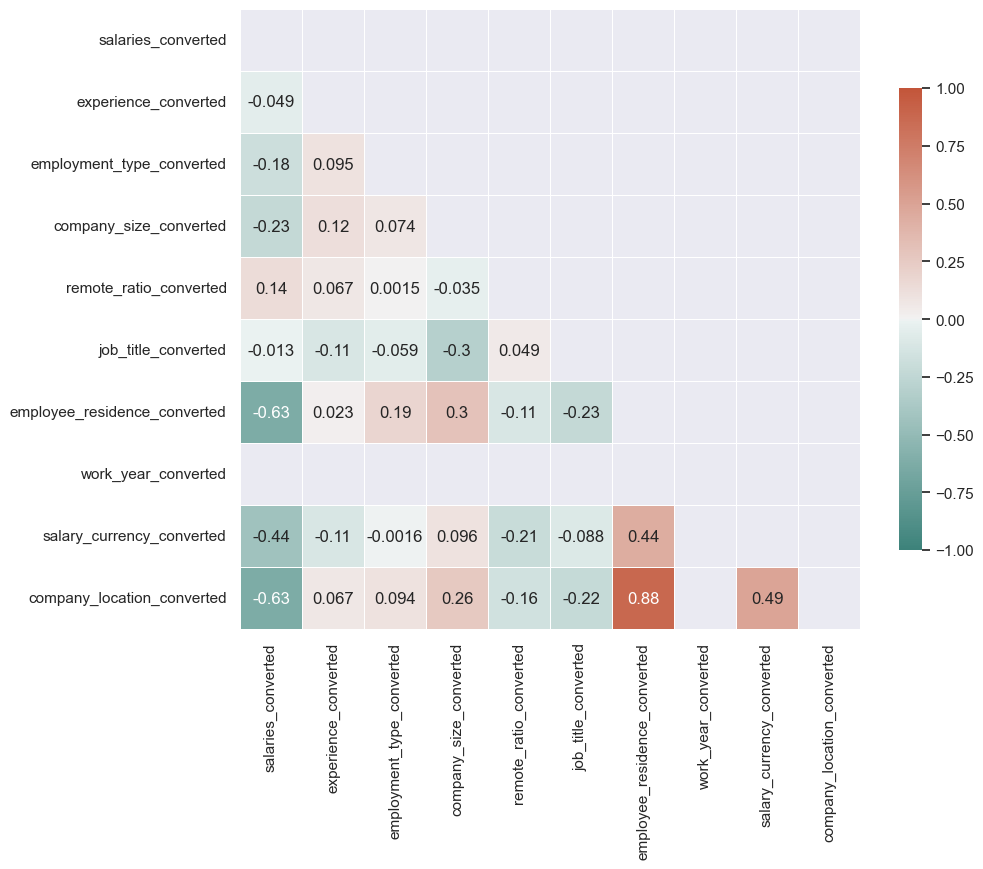

In [5]:

print_corr(k_dummies)

Having the columns and data set converted and analyzed, we do not found strong correlations between the variables.
The most correlated ones are experience, company size and job title. So those, are going to be our choice.

## MACHINE LEARNING PROCESS K-NEAREST NEIGHBORS TEST 1

In [6]:
x= k_dummies[['experience_converted','company_size_converted', 'job_title_converted']]
y= k_dummies.remote_ratio_converted
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

from sklearn.neighbors import KNeighborsClassifier
K= KNeighborsClassifier()
K.fit(X_train,y_train)


Train set: (485, 3) (485,)
Test set: (122, 3) (122,)


KNeighborsClassifier()

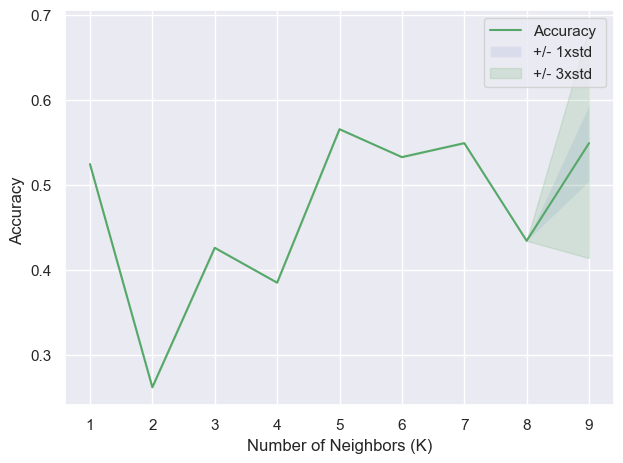

In [7]:
k_perfect(X_train,y_train, X_test, y_test)

In [8]:
k = 5
#Train Model and Predict  
neigh5 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh5

neigh5_pre= neigh5.predict(X_test)
print("Test set Accuracy: ", metrics.accuracy_score(y_test, neigh5_pre))
f1_score(y_test, neigh5_pre, average='micro')

Test set Accuracy:  0.5655737704918032


0.5655737704918032

Confusion matrix, without normalization
[[11  4  9]
 [ 4  5 14]
 [18  4 53]]


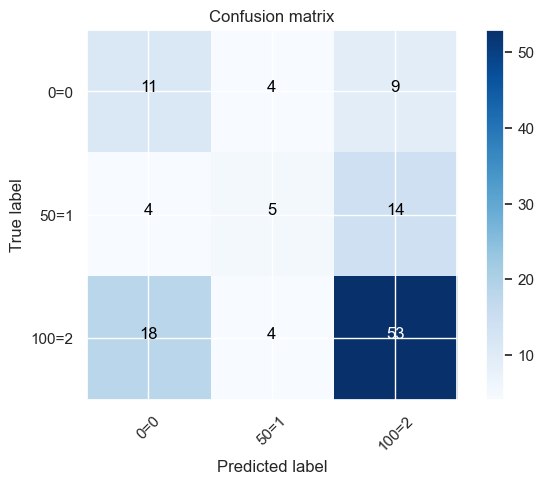

In [9]:
cnf_matrix = confusion_matrix(y_test, neigh5_pre, labels=[0,1, 2])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0=0','50=1', '100=2'],normalize= False,  title='Confusion matrix')

Finally we can see the score for this method it is not really capable of classifing with the given variables, so we are going to imput the rest.

## MACHINE LEARNING PROCESS K-NEAREST NEIGHBORS TEST 2

In [10]:
x2= k_dummies[['salaries_converted', 'experience_converted',
       'employment_type_converted', 'company_size_converted',
       'job_title_converted',
       'employee_residence_converted', 'work_year_converted',
       'salary_currency_converted', 'company_location_converted']]
y2= k_dummies.remote_ratio_converted
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split( x2, y2, test_size=0.2, random_state=4)
print ('Train set:', X2_train.shape,  y2_train.shape)
print ('Test set:', X2_test.shape,  y2_test.shape)

Train set: (485, 9) (485,)
Test set: (122, 9) (122,)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
K6= KNeighborsClassifier()
K6.fit(X2_train,y2_train)

KNeighborsClassifier()

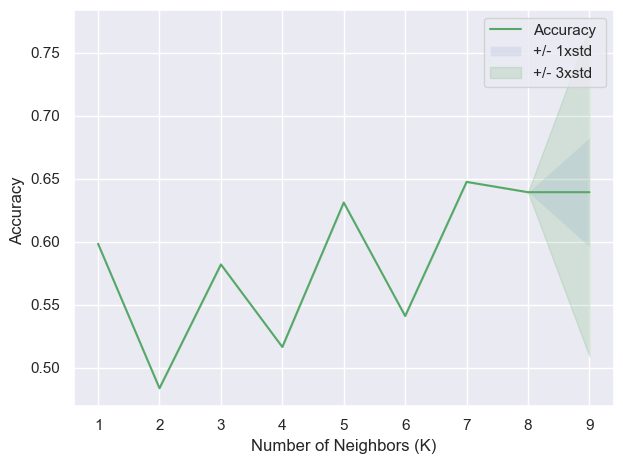

In [12]:
k_perfect(X2_train,y2_train, X2_test, y2_test)

In [13]:
k = 7
#Train Model and Predict  
neigh7 = KNeighborsClassifier(n_neighbors = k).fit(X2_train,y2_train)
neigh7
neig7_pre= neigh7.predict(X2_test)
print("Test set Accuracy: ", metrics.accuracy_score(y2_test, neig7_pre))

f1_score(y2_test, neig7_pre, average='micro')

Test set Accuracy:  0.6475409836065574


0.6475409836065574

Confusion matrix, without normalization
[[11  4  9]
 [ 4  5 14]
 [18  4 53]]


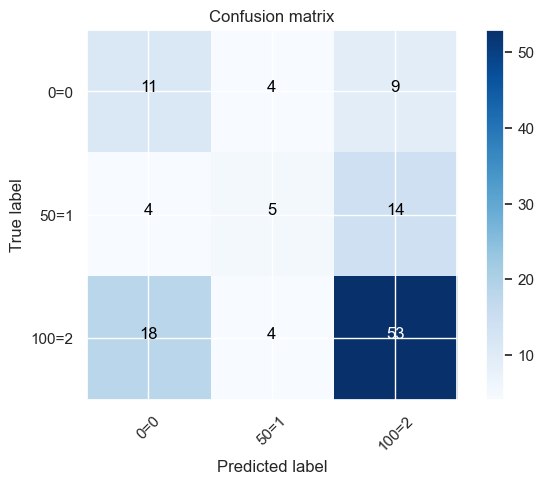

In [14]:
cnf_matrix = confusion_matrix(y2_test, neigh5_pre, labels=[0,1, 2])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0=0','50=1', '100=2'],normalize= False,  title='Confusion matrix')

As we can see, even with this kind of variables the model does not predict accurately the number of remote jobs. We are going to try with classification trees and 
Support Vector Machines.

## LEARNING MACHINE CLASSIFICATION TREE TEST 1

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
x3= k_dummies[['experience_converted','company_size_converted', 'job_title_converted']]
y3= k_dummies.remote_ratio_converted
X3_train, X3_test, y3_train, y3_test = train_test_split( x3, y3, test_size=0.2, random_state=4)
print ('Train set:', X3_train.shape,  y3_train.shape)
print ('Test set:', X3_test.shape,  y3_test.shape)



Train set: (485, 3) (485,)
Test set: (122, 3) (122,)


In [17]:
remote_tree= DecisionTreeClassifier(criterion= "entropy", max_depth = 3, splitter='random')
remote_tree.fit(X3_train, y3_train)
remote_tree_pre= remote_tree.predict(X3_test)
print("Test set Accuracy: ", metrics.accuracy_score(y3_test, remote_tree_pre))
f1_score(y3_test, remote_tree_pre, average='micro')

Test set Accuracy:  0.6147540983606558


0.6147540983606558

Confusion matrix, without normalization
[[ 0  0 24]
 [ 0  0 23]
 [ 0  0 75]]


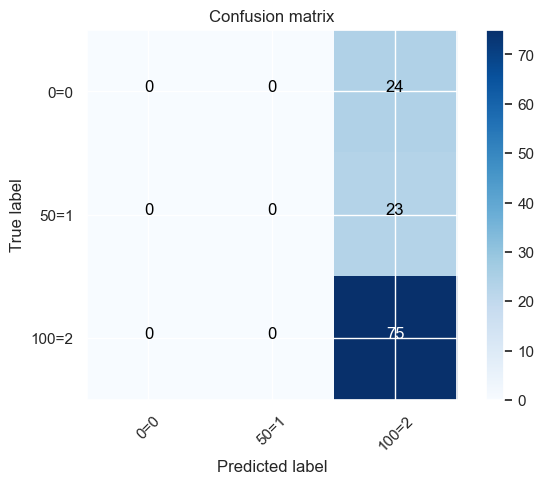

In [18]:
cnf_matrix = confusion_matrix(y3_test, remote_tree_pre, labels=[0,1, 2])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0=0','50=1', '100=2'],normalize= False,  title='Confusion matrix')

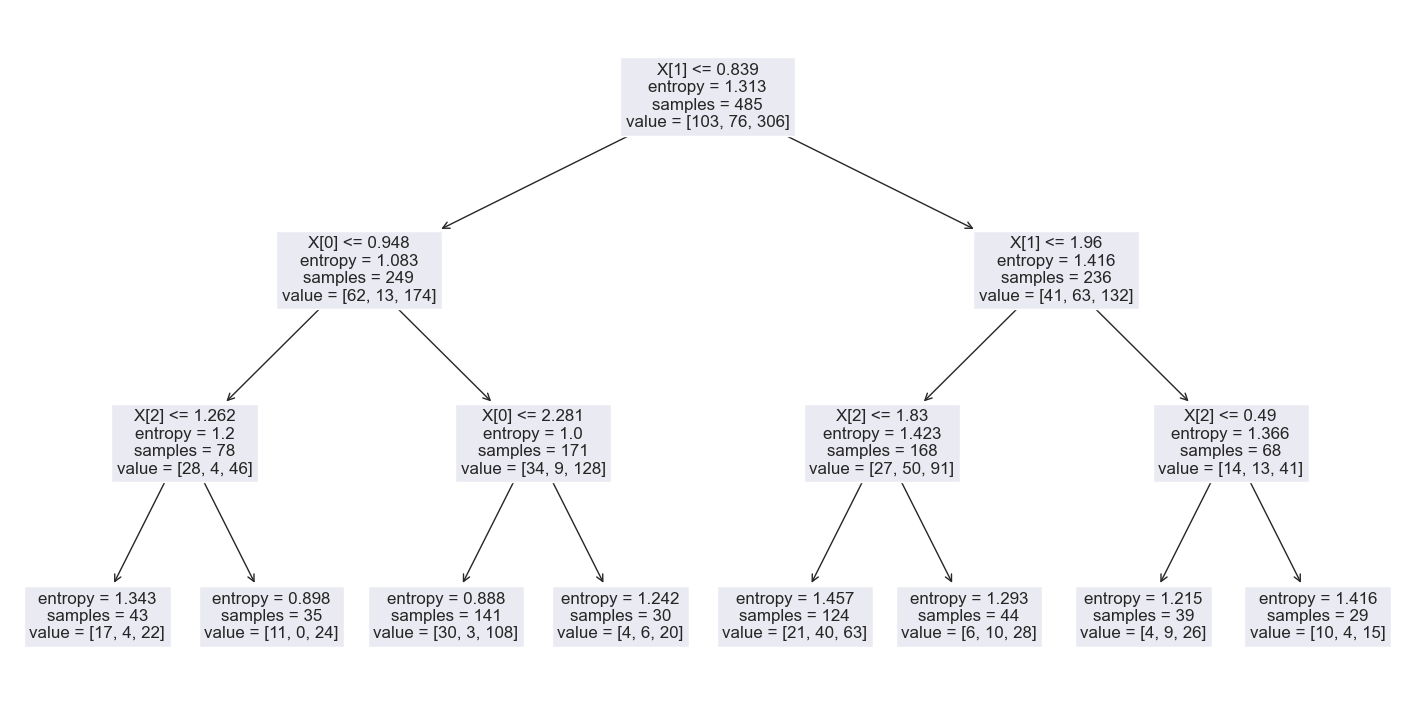

In [19]:
import sklearn.tree as tree
plt.figure(figsize= (18, 9))
tree.plot_tree(remote_tree)
plt.show()

## LEARNING MACHINE CLASSIFICATION TREE TEST 2

In [20]:
x4= k_dummies[['salaries_converted', 'experience_converted',
       'employment_type_converted', 'company_size_converted',
       'job_title_converted',
       'employee_residence_converted', 'work_year_converted',
       'salary_currency_converted', 'company_location_converted']]
y4= k_dummies.remote_ratio_converted
X4_train, X4_test, y4_train, y4_test = train_test_split( x4, y4, test_size=0.2, random_state=4)
print ('Train set:', X4_train.shape,  y4_train.shape)
print ('Test set:', X4_test.shape,  y4_test.shape)

Train set: (485, 9) (485,)
Test set: (122, 9) (122,)


In [21]:
remote_tree2= DecisionTreeClassifier(criterion= "entropy", max_depth = 3, splitter='best')
remote_tree2.fit(X4_train, y4_train)
remote_tree_pre2= remote_tree2.predict(X4_test)
print("Test set Accuracy: ", metrics.accuracy_score(y4_test, remote_tree_pre2))
from sklearn.metrics import f1_score
f1_score(y4_test, remote_tree_pre2, average='micro')

Test set Accuracy:  0.6639344262295082


0.6639344262295082

Confusion matrix, without normalization
[[ 4  3 17]
 [ 0  7 16]
 [ 1  4 70]]


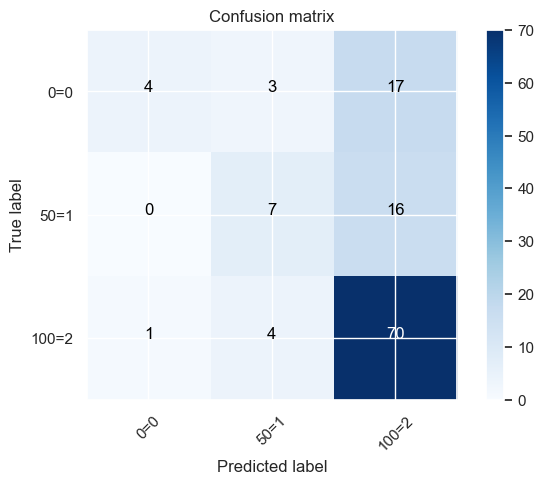

In [22]:
cnf_matrix = confusion_matrix(y4_test, remote_tree_pre2, labels=[0,1, 2])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0=0','50=1', '100=2'],normalize= False,  title='Confusion matrix')

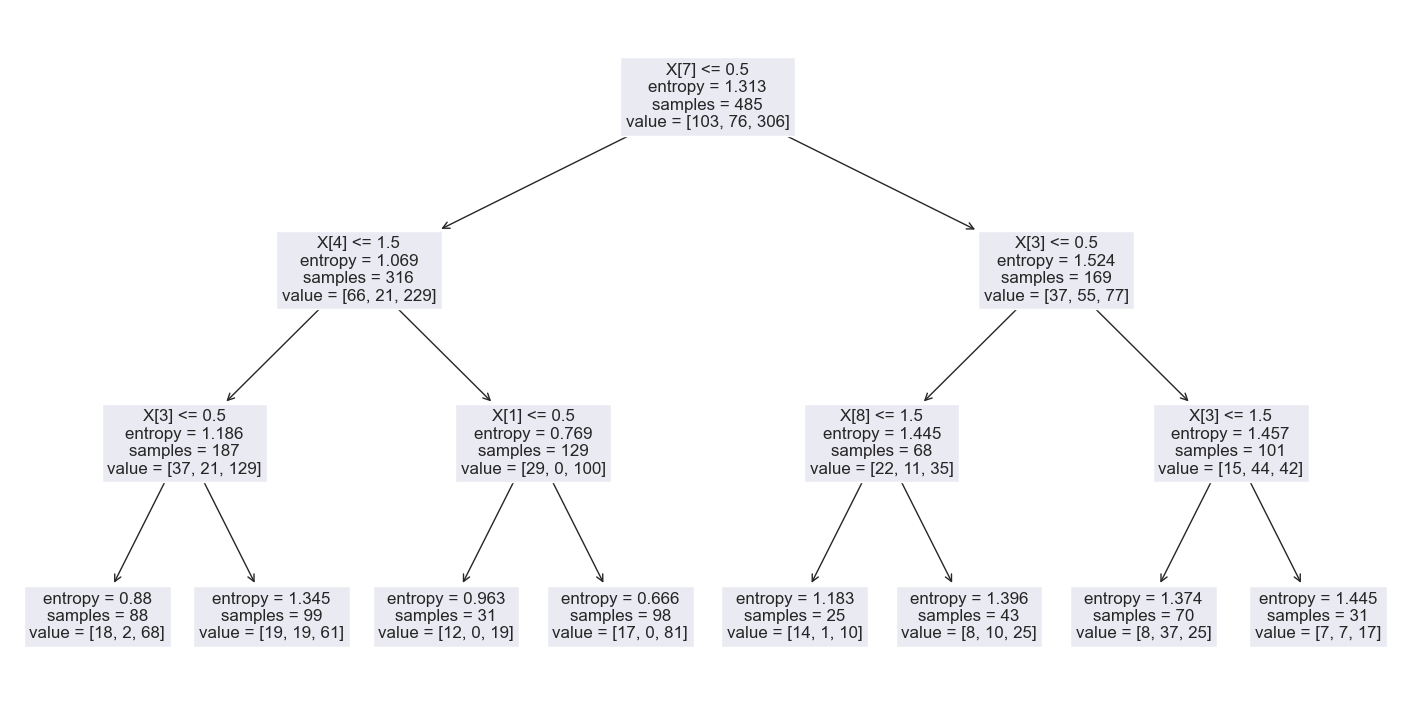

In [23]:
plt.figure(figsize= (18, 9))
tree.plot_tree(remote_tree2)
plt.show()

## LEARNING MACHINE SUPPORT VECTOR MACHINE TEST 1  

In [24]:
from sklearn.svm import SVC
x5= k_dummies[['experience_converted','company_size_converted', 'job_title_converted']]
y5= k_dummies.remote_ratio_converted
X5_train, X5_test, y5_train, y5_test = train_test_split( x5, y5, test_size=0.2, random_state=4)
print ('Train set:', X5_train.shape,  y5_train.shape)
print ('Test set:', X5_test.shape,  y5_test.shape)

Train set: (485, 3) (485,)
Test set: (122, 3) (122,)


In [25]:
SVM= SVC()
SVM.fit(X5_train,y5_train)
SVM_pred=SVM.predict(X5_test)
print("Test set Accuracy: ", metrics.accuracy_score(y5_test, SVM_pred))
f1_score(y5_test, SVM_pred, average='micro')

Test set Accuracy:  0.6147540983606558


0.6147540983606558

Confusion matrix, without normalization
[[ 0  0 24]
 [ 0  0 23]
 [ 0  0 75]]


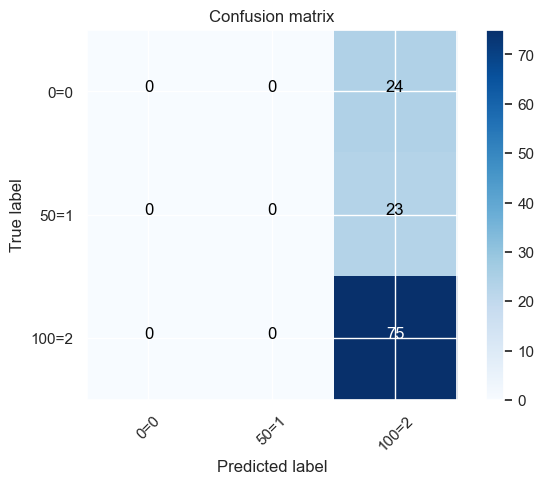

In [26]:
cnf_matrix = confusion_matrix(y5_test, SVM_pred, labels=[0,1, 2])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0=0','50=1', '100=2'],normalize= False,  title='Confusion matrix')

## LEARNING MACHINE SUPPORT VECTOR MACHINE TEST 2

In [27]:
x6= k_dummies[['salaries_converted', 'experience_converted',
       'employment_type_converted', 'company_size_converted',
       'job_title_converted',
       'employee_residence_converted', 'work_year_converted',
       'salary_currency_converted', 'company_location_converted']]
y6= k_dummies.remote_ratio_converted
X6_train, X6_test, y6_train, y6_test = train_test_split( x6, y6, test_size=0.2, random_state=4)
print ('Train set:', X6_train.shape,  y6_train.shape)
print ('Test set:', X6_test.shape,  y6_test.shape)

Train set: (485, 9) (485,)
Test set: (122, 9) (122,)


In [28]:
SVM2= SVC(gamma=0.5)
SVM2.fit(X5_train,y5_train)
SVM_pred2=SVM.predict(X5_test)
print("Test set Accuracy: ", metrics.accuracy_score(y6_test, SVM_pred2))
f1_score(y6_test, SVM_pred2, average='micro')

Test set Accuracy:  0.6147540983606558


0.6147540983606558

Confusion matrix, without normalization
[[ 0  0 24]
 [ 0  0 23]
 [ 0  0 75]]


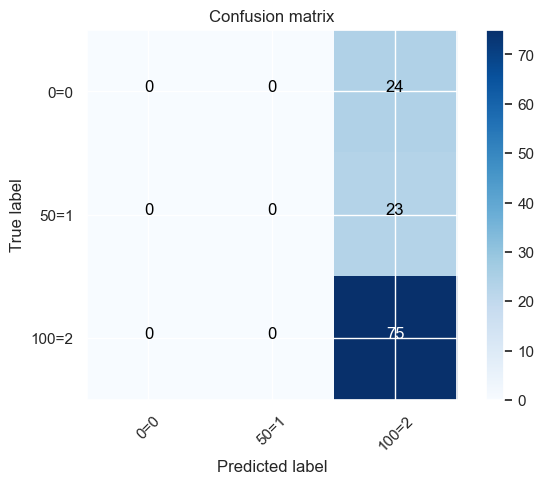

In [29]:
cnf_matrix = confusion_matrix(y6_test, SVM_pred2, labels=[0,1, 2])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0=0','50=1', '100=2'],normalize= False,  title='Confusion matrix')

## MACHINE LEARNING K.NEAREST NEIGHBORS FOR SALARIES 

In [30]:
k_dummies.columns

Index(['salaries_converted', 'experience_converted',
       'employment_type_converted', 'company_size_converted',
       'remote_ratio_converted', 'job_title_converted',
       'employee_residence_converted', 'work_year_converted',
       'salary_currency_converted', 'company_location_converted'],
      dtype='object')

In [31]:
X_salaries= k_dummies[[ 'employee_residence_converted', 'salary_currency_converted', 'company_location_converted']]
Y_salaries= k_dummies.salaries_converted
LRS= KNeighborsClassifier()
X7_train, X7_test, y7_train, y7_test = train_test_split(X_salaries, Y_salaries, test_size=0.2, random_state=4)
LRS.fit(X7_train, y7_train)


KNeighborsClassifier()

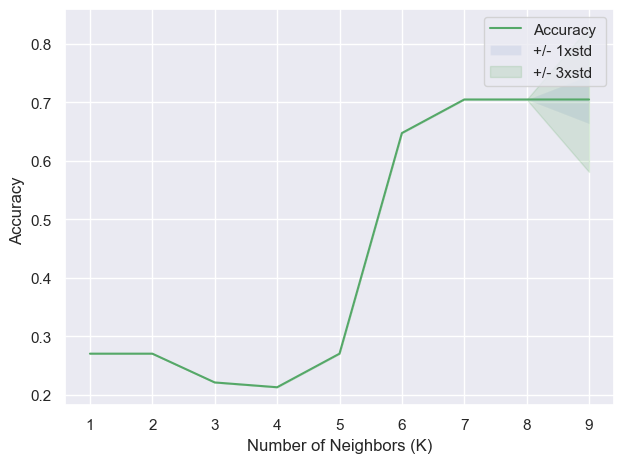

In [32]:
k_perfect(X7_train,y7_train, X7_test, y7_test)

In [33]:
k = 9
#Train Model and Predict  
LRS = KNeighborsClassifier(n_neighbors = k).fit(X7_train,y7_train)
LRS
LRS_pre= LRS.predict(X7_test)
print("Test set Accuracy: ", metrics.accuracy_score(y7_test, LRS_pre))

f1_score(y7_test, LRS_pre, average='micro')

Test set Accuracy:  0.7049180327868853


0.7049180327868853

Confusion matrix, without normalization
[[25  2  4]
 [ 9  4 15]
 [ 4  2 57]]


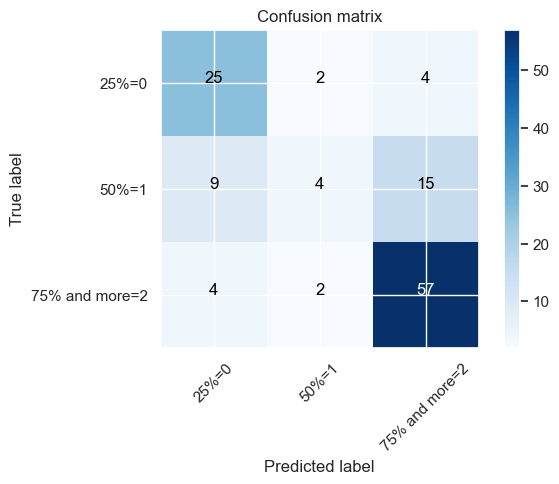

In [34]:
cnf_matrix = confusion_matrix(y7_test, LRS_pre, labels=[0,1, 2])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['25%=0','50%=1', '75% and more=2'],normalize= False,  title='Confusion matrix')

## MACHINE LEARNING DECISSION TREE FOR SALARIES

In [35]:
X_8salaries= k_dummies[[ 'employee_residence_converted', 'salary_currency_converted', 'company_location_converted']]
Y_8salaries= k_dummies.salaries_converted
X8_train, X8_test, y8_train, y8_test = train_test_split(X_8salaries, Y_8salaries, test_size=0.2, random_state=4)


In [36]:
salaries_tree= DecisionTreeClassifier(criterion='entropy')
salaries_tree.fit(X8_train, y8_train)
salaries_tre_pre= salaries_tree.predict(X8_test)

In [37]:
print("Test set Accuracy: ", metrics.accuracy_score(y8_test, salaries_tre_pre))

f1_score(y8_test, salaries_tre_pre, average='micro')

Test set Accuracy:  0.7049180327868853


0.7049180327868853

Confusion matrix, without normalization
[[25  5  1]
 [ 9  6 13]
 [ 4  4 55]]


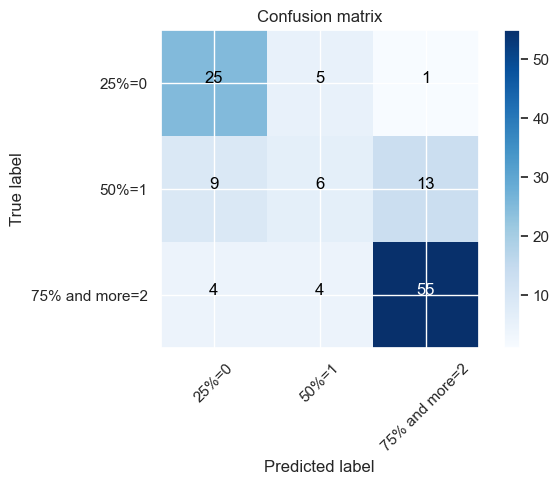

In [38]:
cnf_matrix = confusion_matrix(y8_test, salaries_tre_pre, labels=[0,1, 2])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['25%=0','50%=1', '75% and more=2'],normalize= False,  title='Confusion matrix')

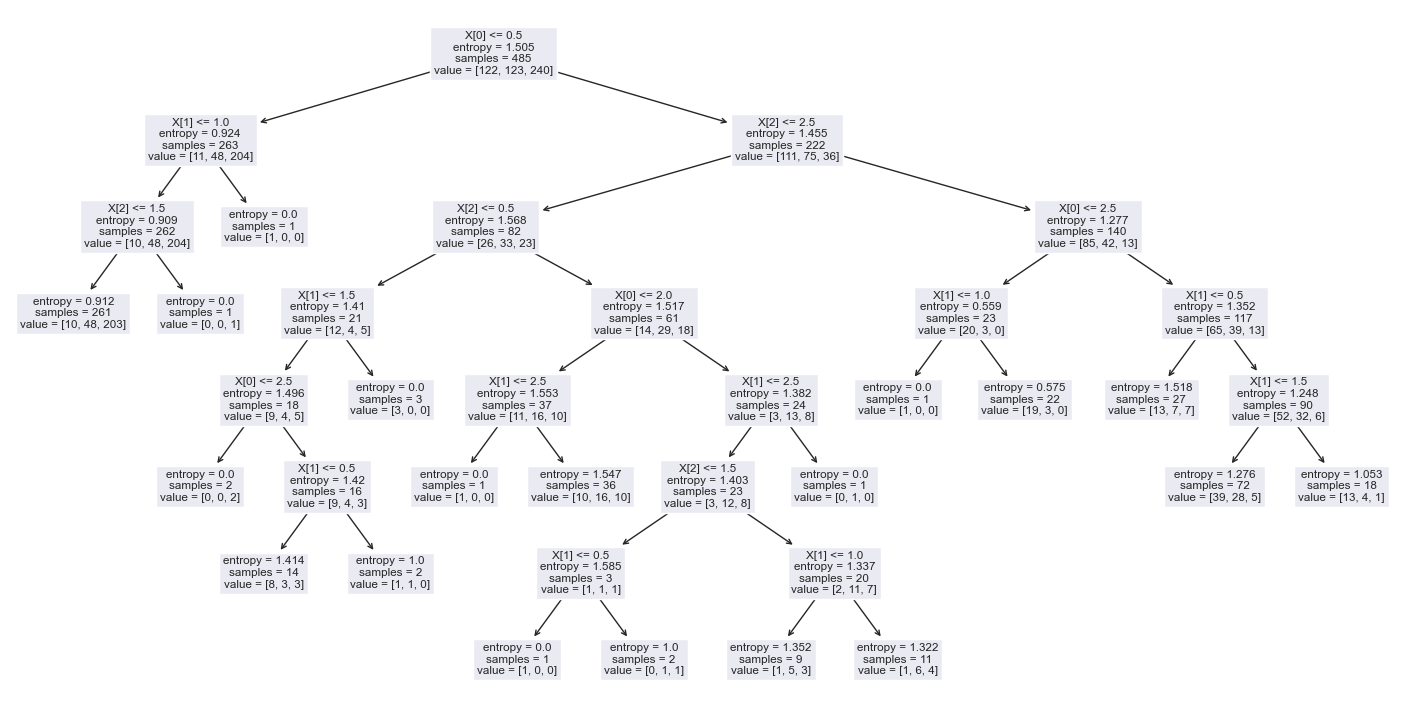

In [39]:
plt.figure(figsize= (18, 9))
tree.plot_tree(salaries_tree)
plt.show()

## MACHINE LEARNING SVM FOR SALARIES

In [40]:
X_9salaries= k_dummies[[ 'employee_residence_converted', 'salary_currency_converted', 'company_location_converted']]
Y_9salaries= k_dummies.salaries_converted
X9_train, X9_test, y9_train, y9_test = train_test_split(X_9salaries, Y_9salaries, test_size=0.2, random_state=4)
Salaries_SVM= SVC( C= 0.9, kernel='poly', degree=6)
Salaries_SVM.fit(X9_train,y9_train)
Salaries_SVM_pre=Salaries_SVM.predict(X9_test)
print("Test set Accuracy: ", metrics.accuracy_score(y9_test, Salaries_SVM_pre))

f1_score(y9_test, Salaries_SVM_pre, average='micro')

Test set Accuracy:  0.7131147540983607


0.7131147540983606

Confusion matrix, without normalization
[[25  5  1]
 [ 8  7 13]
 [ 4  4 55]]


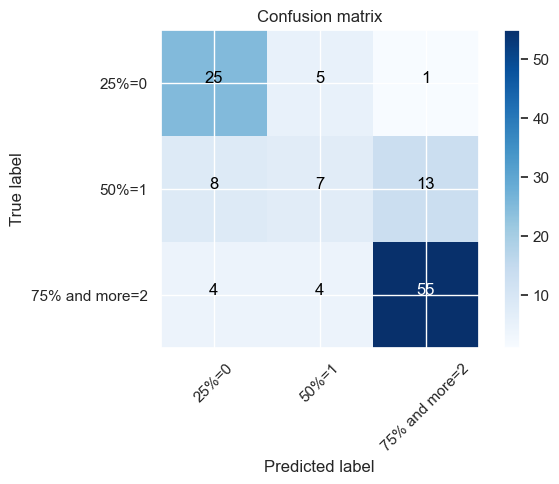

In [41]:
cnf_matrix = confusion_matrix(y9_test, Salaries_SVM_pre, labels=[0,1, 2])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['25%=0','50%=1', '75% and more=2'],normalize= False,  title='Confusion matrix')

## MACHINE LEARNING LINEAR REGRESSION FOR SALARIES

In [42]:
X_10salaries= k_dummies[[ 'employee_residence_converted', 'salary_currency_converted']]
Y_10salaries= df.salary_in_usd
X10_train, X10_test, y10_train, y10_test = train_test_split(X_10salaries, Y_10salaries, test_size=0.2, random_state=4)

In [43]:
summary_regression_model(X_10salaries, Y_10salaries)

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     145.5
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           2.61e-52
Time:                        16:56:38   Log-Likelihood:                -7521.5
No. Observations:                 607   AIC:                         1.505e+04
Df Residuals:                     604   BIC:                         1.506e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [44]:
SLR= LinearRegression()
SLR.fit(X10_train, y10_train)
SLR_pre= SLR.predict(X10_test)

In [45]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(SLR_pre - y10_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((SLR_pre - y10_test) ** 2))
print("R2-score: %.2f" % r2_score(SLR_pre, y10_test))


Mean absolute error: 41130.72
Residual sum of squares (MSE): 3076075410.35
R2-score: -0.77


## RESULTADOS DE LOS TEST

#TEST 1: K NEAREST REMOTE WORK

In [46]:
neigh5_pre= neigh5.predict(X_test)
print("Test set Accuracy: ", metrics.accuracy_score(y_test, neigh5_pre))
f1_score(y_test, neigh5_pre, average='micro')
confusion_matrix(y_test, neigh5_pre)

Test set Accuracy:  0.5655737704918032


array([[11,  4,  9],
       [ 4,  5, 14],
       [18,  4, 53]], dtype=int64)

#TEST 2: K NEAREST REMOTE WORK

In [47]:
print("Test set Accuracy: ", metrics.accuracy_score(y2_test, neig7_pre))

f1_score(y2_test, neig7_pre, average='micro')
confusion_matrix(y2_test, neig7_pre)

Test set Accuracy:  0.6475409836065574


array([[ 4,  2, 18],
       [ 5,  6, 12],
       [ 2,  4, 69]], dtype=int64)

#TEST 3 CLASSIFICATION TREE REMOTE WORK 


In [48]:
print("Test set Accuracy: ", metrics.accuracy_score(y3_test, remote_tree_pre))
f1_score(y3_test, remote_tree_pre, average='micro')
confusion_matrix(y3_test, remote_tree_pre)

Test set Accuracy:  0.6147540983606558


array([[ 0,  0, 24],
       [ 0,  0, 23],
       [ 0,  0, 75]], dtype=int64)

#TEST 4 CLASSIFICATION TREE REMOTE WORK 

In [49]:
print("Test set Accuracy: ", metrics.accuracy_score(y4_test, remote_tree_pre2))
f1_score(y4_test, remote_tree_pre2, average='micro')
confusion_matrix(y4_test, remote_tree_pre2)

Test set Accuracy:  0.6639344262295082


array([[ 4,  3, 17],
       [ 0,  7, 16],
       [ 1,  4, 70]], dtype=int64)

#TEST 5 SVM REMOTE WORK 

In [50]:
print("Test set Accuracy: ", metrics.accuracy_score(y5_test, SVM_pred))
f1_score(y5_test, SVM_pred, average='micro')
confusion_matrix(y5_test, SVM_pred)

Test set Accuracy:  0.6147540983606558


array([[ 0,  0, 24],
       [ 0,  0, 23],
       [ 0,  0, 75]], dtype=int64)

#TEST 6 SVM REMOTE WORK 

In [51]:
print("Test set Accuracy: ", metrics.accuracy_score(y6_test, SVM_pred))
f1_score(y6_test, SVM_pred, average='micro')
confusion_matrix(y6_test, SVM_pred2)

Test set Accuracy:  0.6147540983606558


array([[ 0,  0, 24],
       [ 0,  0, 23],
       [ 0,  0, 75]], dtype=int64)

#TEST 7 K-NEAREST FOR SALARIES

In [52]:
print("Test set Accuracy: ", metrics.accuracy_score(y7_test, LRS_pre))

f1_score(y7_test, LRS_pre, average='micro')
confusion_matrix(y7_test, LRS_pre)

Test set Accuracy:  0.7049180327868853


array([[25,  2,  4],
       [ 9,  4, 15],
       [ 4,  2, 57]], dtype=int64)

#TEST 8 CLASSIFICATION TREE FOR SALARIES

In [53]:
print("Test set Accuracy: ", metrics.accuracy_score(y8_test, salaries_tre_pre))

f1_score(y8_test, salaries_tre_pre, average='micro')

confusion_matrix(y8_test, salaries_tre_pre)

Test set Accuracy:  0.7049180327868853


array([[25,  5,  1],
       [ 9,  6, 13],
       [ 4,  4, 55]], dtype=int64)

#TEST 9 SVM TREE FOR SALARIES

In [54]:
print("Test set Accuracy: ", metrics.accuracy_score(y9_test, Salaries_SVM_pre))

f1_score(y9_test, Salaries_SVM_pre, average='micro')

confusion_matrix(y9_test, Salaries_SVM_pre)

Test set Accuracy:  0.7131147540983607


array([[25,  5,  1],
       [ 8,  7, 13],
       [ 4,  4, 55]], dtype=int64)

#TEST 9 LINEAR REGRESSION FOR SALARIES

In [55]:
summary_regression_model(X_10salaries, Y_10salaries)

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     145.5
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           2.61e-52
Time:                        16:56:39   Log-Likelihood:                -7521.5
No. Observations:                 607   AIC:                         1.505e+04
Df Residuals:                     604   BIC:                         1.506e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [56]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(SLR_pre - y10_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((SLR_pre - y10_test) ** 2))
print("R2-score: %.2f" % r2_score(SLR_pre, y10_test))

Mean absolute error: 41130.72
Residual sum of squares (MSE): 3076075410.35
R2-score: -0.77


## UNSUPERVISED GROUPING

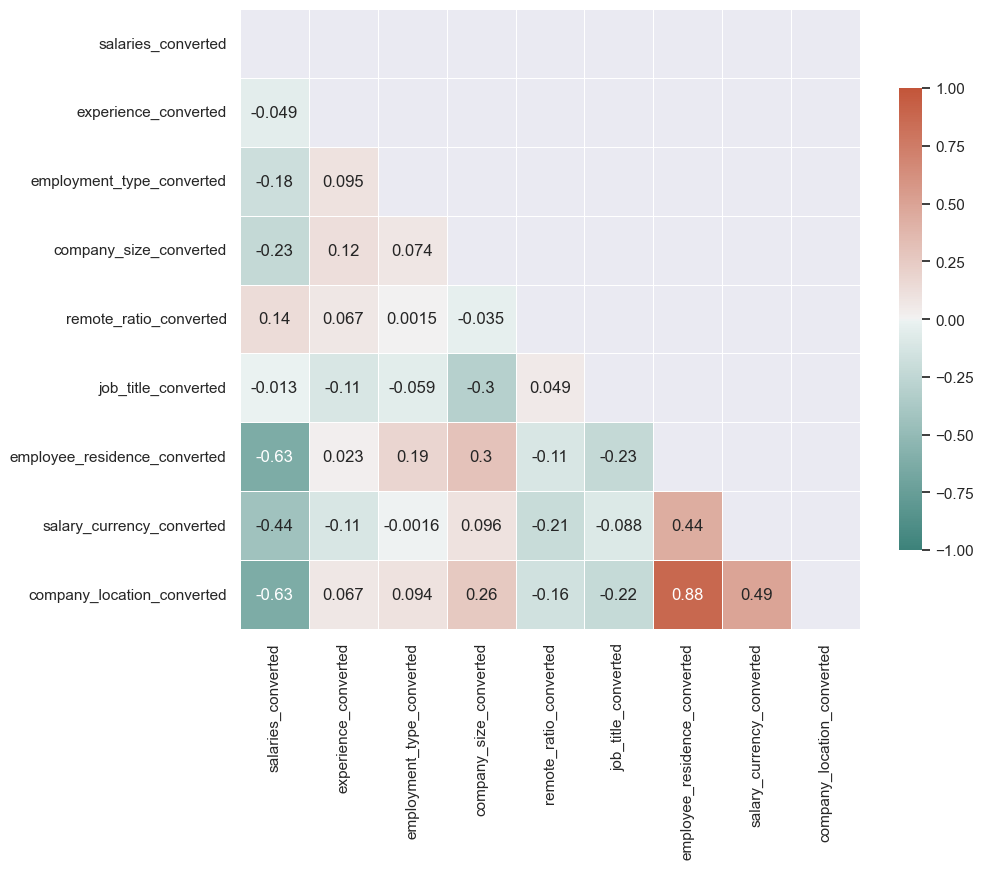

In [57]:
print_corr(k_dummies.drop('work_year_converted', axis=1))

In [58]:
from sklearn.cluster import DBSCAN


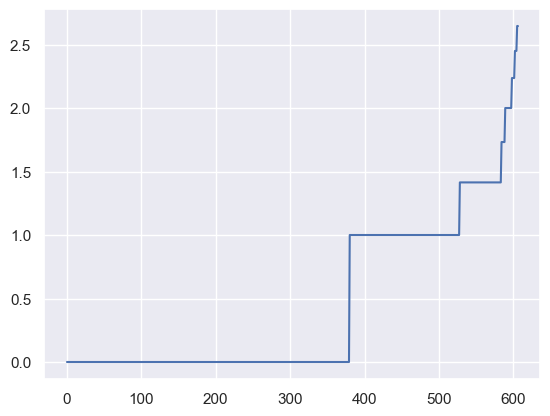

In [59]:
perfect_epsilon(k_dummies)

In [60]:
db = DBSCAN(eps=1.5, min_samples=10).fit(k_dummies)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
k_dummies["cluster classification"]=labels


In [61]:
k_dummies

,salaries_converted,experience_converted,employment_type_converted,company_size_converted,remote_ratio_converted,job_title_converted,employee_residence_converted,work_year_converted,salary_currency_converted,company_location_converted,cluster classification
0,1,0,0,1,0,1,3,2,1,3,2
1,2,1,0,2,0,0,3,2,0,3,-1
2,2,1,0,0,1,0,1,2,3,1,4
3,0,0,0,2,0,0,3,2,0,3,2
4,2,1,0,1,1,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
602,2,1,0,0,2,2,0,2,0,0,0
603,2,1,0,0,2,2,0,2,0,0,0
604,2,1,0,0,0,3,0,2,0,0,0
605,2,1,0,0,2,3,0,2,0,0,0


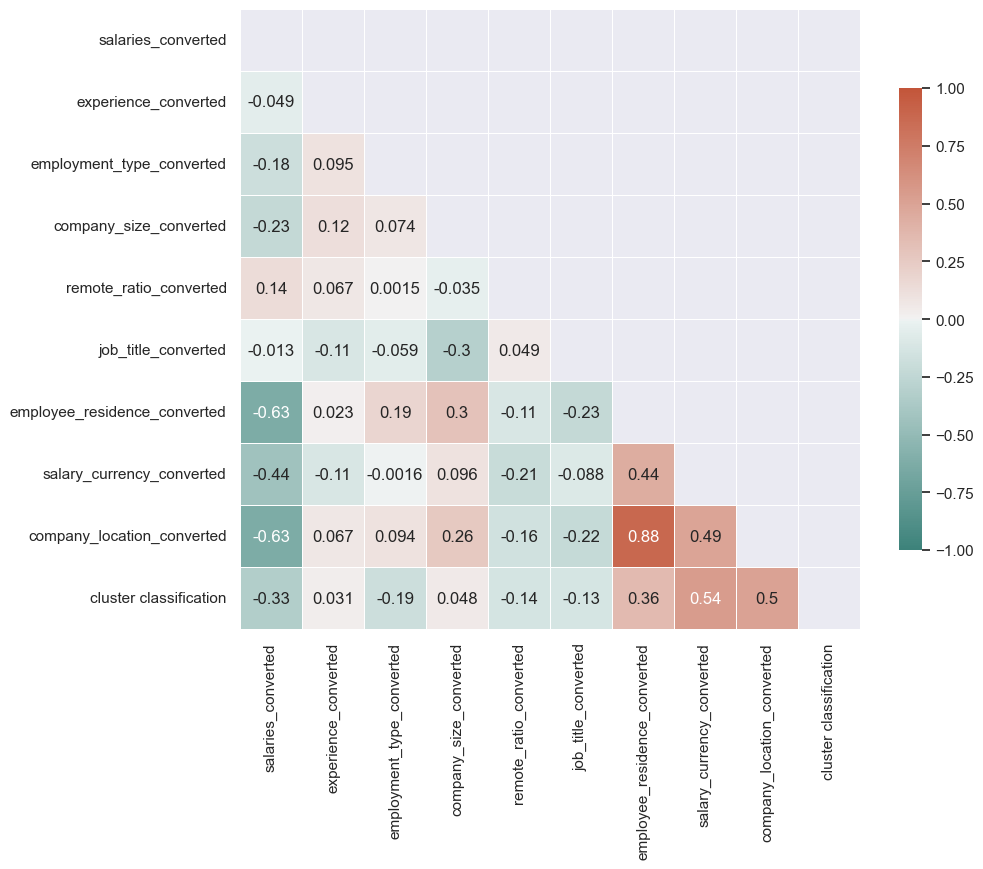

In [62]:
print_corr(k_dummies.drop('work_year_converted', axis=1))

In [63]:
X_11salaries= k_dummies.drop('cluster classification', axis=1)
Y_11salaries= k_dummies['cluster classification']
X11_train, X11_test, y11_train, y11_test = train_test_split(X_11salaries, Y_11salaries, test_size=0.2, random_state=4)
Salaries11_SVM= SVC()
Salaries11_SVM.fit(X11_train,y11_train)
Salaries_SVM_pre11=Salaries11_SVM.predict(X11_test)
print("Test set Accuracy: ", metrics.accuracy_score(y11_test, Salaries_SVM_pre11))
k_dummies['cluster classification'].unique()

Test set Accuracy:  0.9672131147540983


array([ 2, -1,  4,  0,  1,  3], dtype=int64)

Confusion matrix, without normalization
[[22  0  0  0  0  0]
 [ 2 13  0  0  0  1]
 [ 0  0  5  0  0  0]
 [ 0  0  0 60  0  0]
 [ 0  0  0  0  8  0]
 [ 0  1  0  0  0 10]]


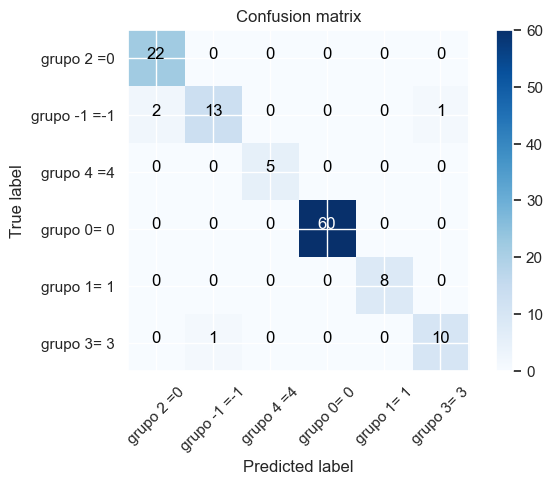

In [64]:
cnf_matrix = confusion_matrix(y11_test, Salaries_SVM_pre11, labels=[2, -1,  4,  0,  1,  3])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['grupo 2 =0','grupo -1 =-1', 'grupo 4 =4', 'grupo 0= 0', 'grupo 1= 1', 'grupo 3= 3'],normalize= False,  title='Confusion matrix')

In [65]:
X_12salaries= k_dummies.drop('cluster classification', axis=1)
Y_12salaries= k_dummies['cluster classification']
X12_train, X12_test, y12_train, y12_test = train_test_split(X_12salaries, Y_12salaries, test_size=0.2, random_state=4)

cluster_tree= tree
cluster_tree= DecisionTreeClassifier(criterion='entropy', max_depth= 4)
cluster_tree.fit(X12_train, y12_train)
cluster_tree_pre= cluster_tree.predict(X12_test)

In [66]:
print("Test set Accuracy: ", metrics.accuracy_score(y12_test, cluster_tree_pre))

Test set Accuracy:  0.9180327868852459


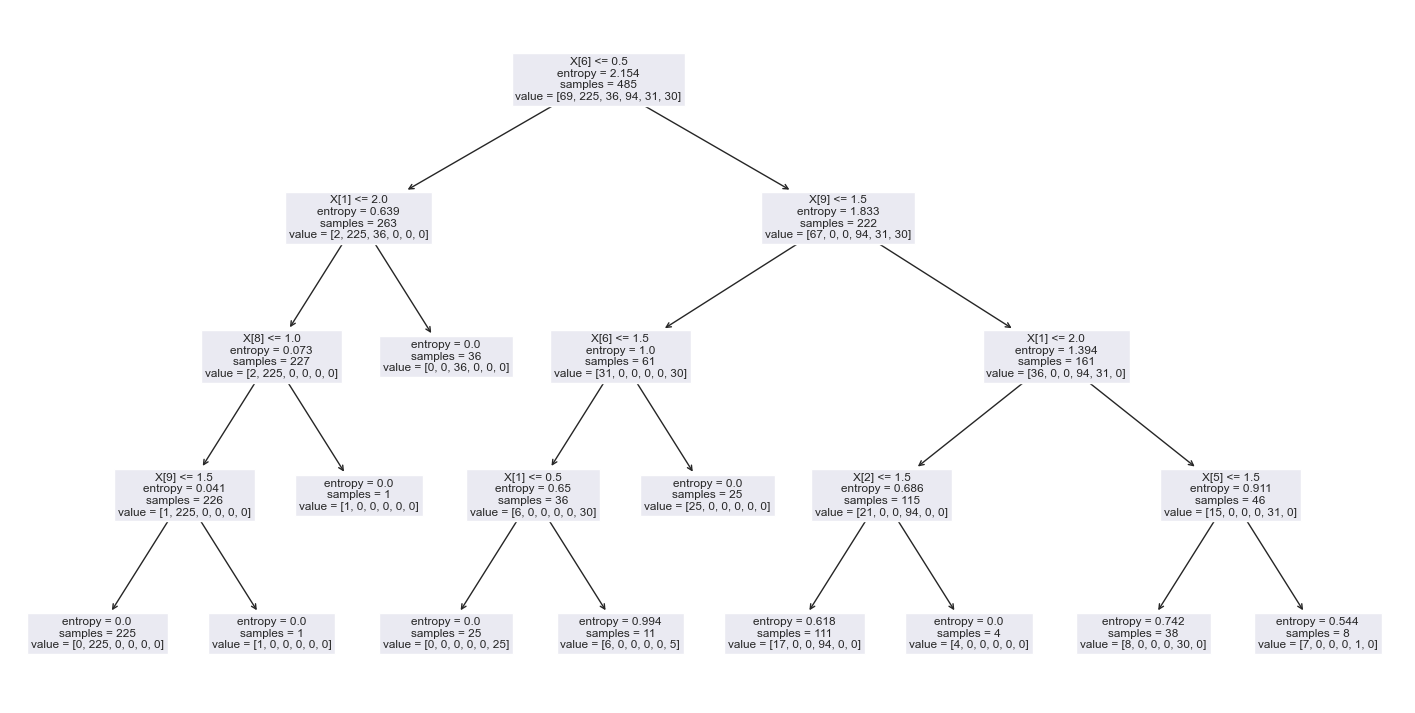

In [67]:
plt.figure(figsize= (18, 9))
tree.plot_tree(cluster_tree)
plt.show()

Confusion matrix, without normalization
[[22  0  0  0  0  0]
 [ 4  9  0  0  0  3]
 [ 0  1  4  0  0  0]
 [ 0  0  0 60  0  0]
 [ 0  0  0  0  8  0]
 [ 0  2  0  0  0  9]]


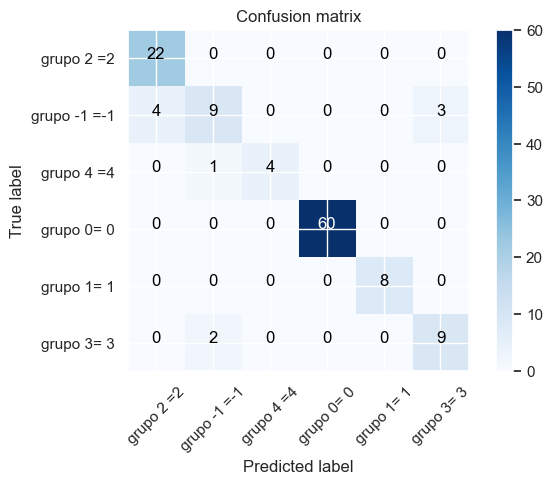

In [68]:
cnf_matrix = confusion_matrix(y12_test, cluster_tree_pre, labels=[2, -1,  4,  0,  1,  3])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['grupo 2 =2','grupo -1 =-1', 'grupo 4 =4', 'grupo 0= 0', 'grupo 1= 1', 'grupo 3= 3'],normalize= False,  title='Confusion matrix')

In [69]:
X_13salaries= k_dummies.drop('cluster classification', axis=1)
Y_13salaries= k_dummies['cluster classification']
X13_train, X13_test, y13_train, y13_test = train_test_split(X_13salaries, Y_13salaries, test_size=0.2, random_state=4)

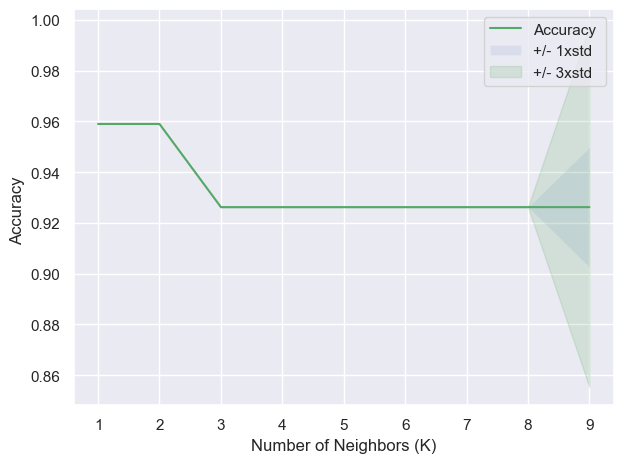

In [70]:
k_perfect(X13_train, y13_train, X13_test, y13_test)


In [71]:
k = 2
#Train Model and Predict  
LRS_cluster = KNeighborsClassifier(n_neighbors = k).fit(X13_train,y13_train)
LRS_cluster
LRS_pre_cluster= LRS_cluster.predict(X13_test)
print("Test set Accuracy: ", metrics.accuracy_score(y13_test, LRS_pre_cluster))

f1_score(y13_test, LRS_pre_cluster, average='micro')

Test set Accuracy:  0.9590163934426229


0.9590163934426229

Confusion matrix, without normalization
[[21  1  0  0  0  0]
 [ 2 13  0  0  0  1]
 [ 0  0  5  0  0  0]
 [ 0  0  0 60  0  0]
 [ 0  0  0  0  8  0]
 [ 0  1  0  0  0 10]]


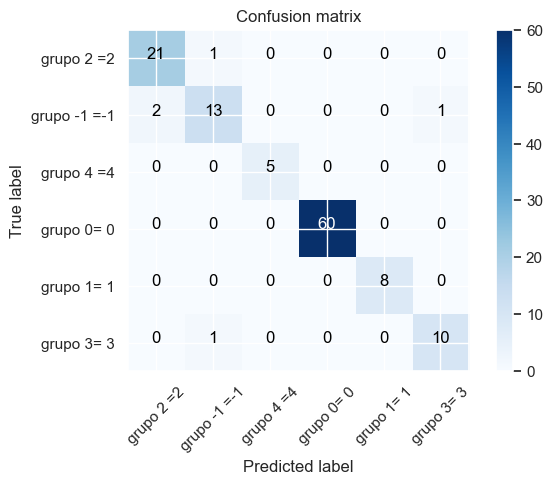

In [72]:
cnf_matrix = confusion_matrix(y13_test, LRS_pre_cluster, labels=[2, -1,  4,  0,  1,  3])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['grupo 2 =2','grupo -1 =-1', 'grupo 4 =4', 'grupo 0= 0', 'grupo 1= 1', 'grupo 3= 3'],normalize= False,  title='Confusion matrix')

In [73]:
from sklearn.cluster import KMeans 
k_dummies1= k_dummies.drop('cluster classification', axis=1)

In [74]:

clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(k_dummies1)



KMeans(n_clusters=4, n_init=12)

In [75]:
k_dummies1["Clus_km"] = labels

k_dummies1

,salaries_converted,experience_converted,employment_type_converted,company_size_converted,remote_ratio_converted,job_title_converted,employee_residence_converted,work_year_converted,salary_currency_converted,company_location_converted,Clus_km
0,1,0,0,1,0,1,3,2,1,3,2
1,2,1,0,2,0,0,3,2,0,3,-1
2,2,1,0,0,1,0,1,2,3,1,4
3,0,0,0,2,0,0,3,2,0,3,2
4,2,1,0,1,1,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
602,2,1,0,0,2,2,0,2,0,0,0
603,2,1,0,0,2,2,0,2,0,0,0
604,2,1,0,0,0,3,0,2,0,0,0
605,2,1,0,0,2,3,0,2,0,0,0


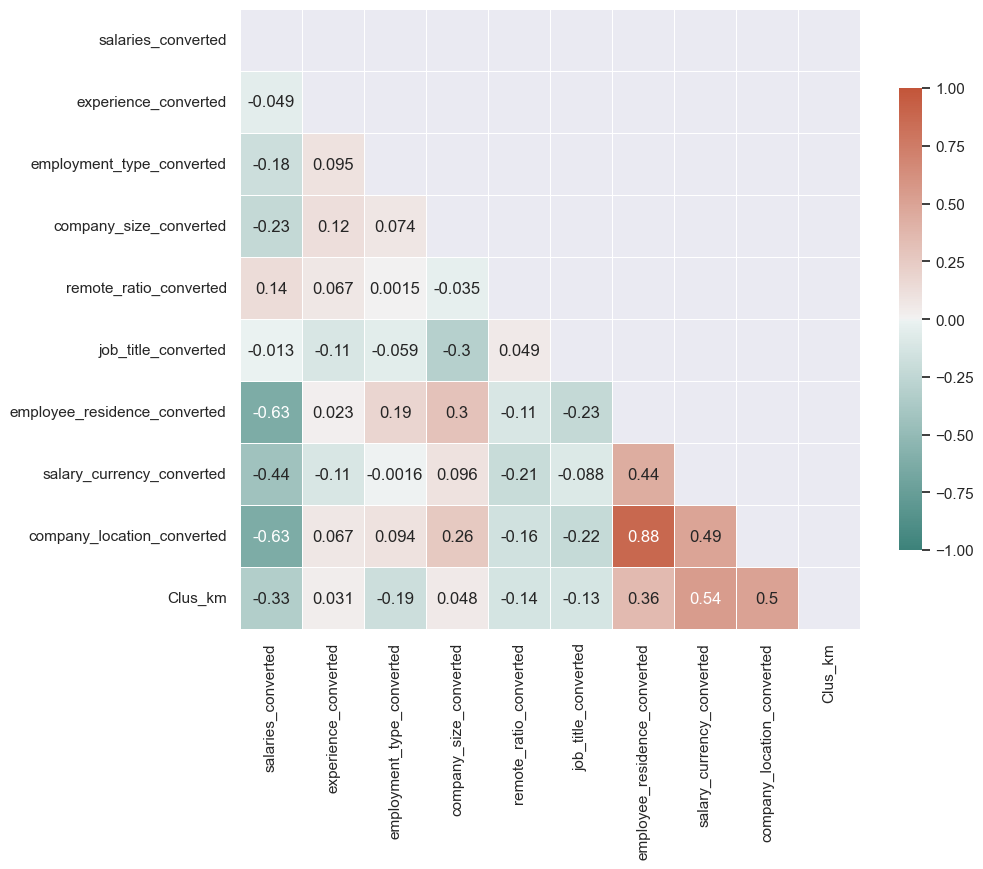

In [76]:
print_corr(k_dummies1.drop('work_year_converted', axis=1))

In [77]:
Xxx= k_dummies1.drop('Clus_km', axis=1)
Yyy= k_dummies1['Clus_km']
xx_train, xx_test, yy_train, yy_test = train_test_split(Xxx, Yyy, test_size=0.2, random_state=4)
SVMXX= SVC()
SVMXX.fit(xx_train, yy_train)


SVC()

In [78]:
SVMXX_pre=SVMXX.predict(xx_test)

In [79]:
print("Test set Accuracy: ", metrics.accuracy_score(yy_test, SVMXX_pre))

f1_score(yy_test, SVMXX_pre, average='micro')

Test set Accuracy:  0.9672131147540983


0.9672131147540983

In [92]:
Xxxx= k_dummies1.drop('Clus_km', axis=1)
Yyyy= k_dummies1['Clus_km']
xxx_train, xxx_test, yyy_train, yyy_test = train_test_split(Xxxx, Yyyy, test_size=0.2, random_state=4)
tree_clss= DecisionTreeClassifier(criterion= 'gini', max_depth=4)
tree_clss.fit(xxx_train, yyy_train)
tree_clss_pre= tree_clss.predict(xxx_test)


In [93]:
print("Test set Accuracy: ", metrics.accuracy_score(yyy_test, tree_clss_pre))

f1_score(yyy_test, tree_clss_pre, average='micro')

Test set Accuracy:  0.9098360655737705


0.9098360655737705

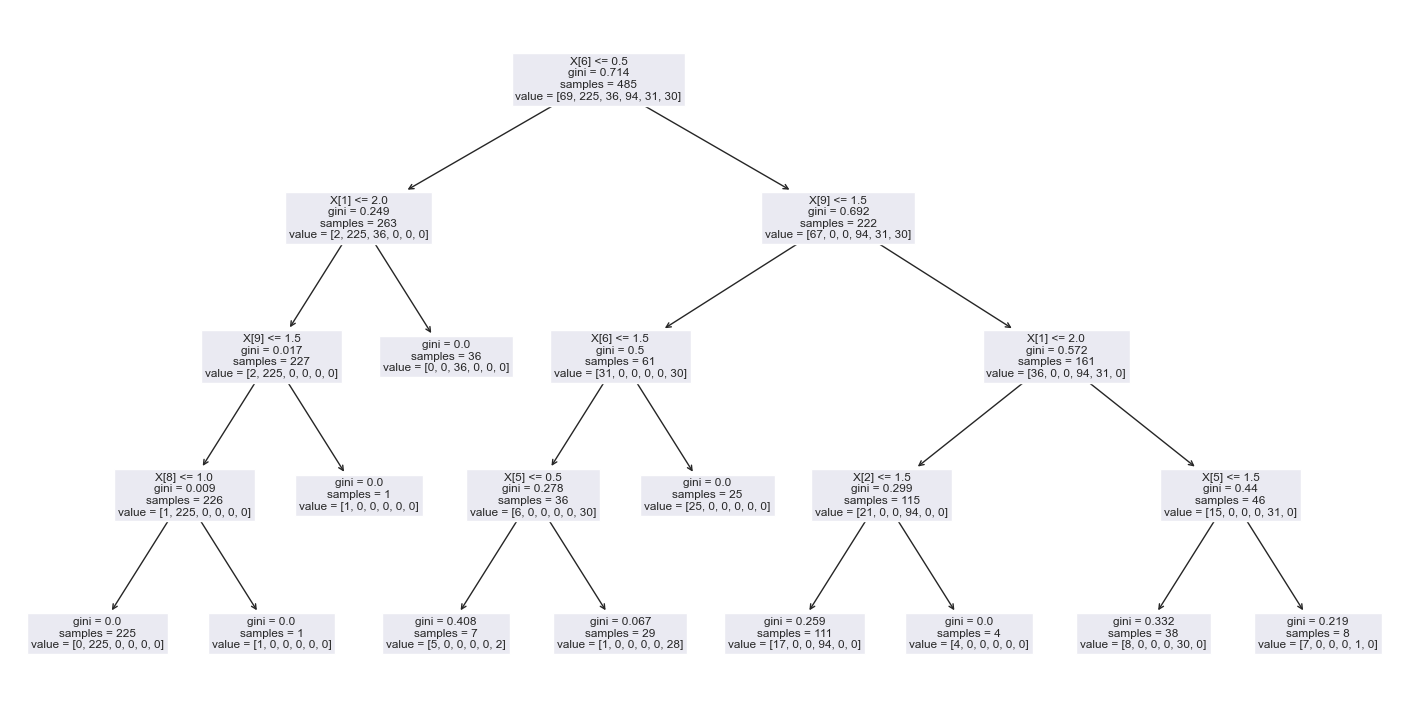

In [94]:
plt.figure(figsize= (18, 9))
tree.plot_tree(tree_clss)
plt.show()

## CONCLUSIONES

